In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from collections import Counter

# E-Commerce Shipping Data Exploration and Analysis

## Backround and Introduction

E-Commerce shipping wants to discover key insights for their customer database. Some key insights the data analytics team are exploring are what variables are correlated with a higher customer rating, and what factors are correlated with on vs. off-time deliveries. The goal of this analysis is to understand how to improve E-Commerce Shipping’s delivery times, and uncover any correlated factors for increasing customer satisfaction.

What opportunities exist for E-Commerce Shipping to increase it’s on-time deliveries by at least 10% and uncover correlated factors of customer satisfaction or cost reduction by analysing warehouse data, shipment modes, and corresponding customer data?

## First Data Inspection

Turn dataset into a Dataframe

In [2]:
shipping_df = pd.read_csv("E-Commerce Shipping Data_train.csv")

Read head and tail of df

In [3]:
shipping_df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [4]:
shipping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Eleven columns. 4 columns of categorical variables, with 7 numerical columns.
No missing or ambiguous data is contained within the dataset.

### Initial statistics

In [5]:
shipping_df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Initial exploration of the data reveals warehouse F to be the top warehouse block, with shipping the most frequently used shipment type accross the dataset, and most products being shipped with a low product importance.

Specifically for our business problem, deliveries reached customers on time 59.6% of the time. 40% of E-Commerce shippings deliveries were late. This analysis will focus on opportunities to improve Are there any opportunities for E-Commerce shipping to improve this metric by at least 10%, and explore any opportunities to reduce costs or boost customer satisfaction.

In [6]:
shipping_df.describe(include=object)

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [43]:
#creating dummy variables for categorical variable analysis 
dummy_var=pd.get_dummies(shipping_df[['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']])

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,0,0,0,1,0,1,0,0,0,1,0,1,0
1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,1,0,1
4,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,0,0,0,0,1,0,0,1,0,0,1,0,1


Dummy variables have been created for the categorical variables to assist in the analysis.

## Data Exploration

In [14]:
# Create variable for 'Reached.on.Time_Y.N' column as we will be using it repeatedly in this analysis.
on_time = 'Reached.on.Time_Y.N'
#Total count of each variable in the "Reached on Time" column
shipping_df[on_time].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

With the above initial statistics table, about 60% of E-Commerce Shipping's deliveries arrive on time, with around 40% being delayed.

<AxesSubplot:title={'center':'Count of Reached on time Yes or No'}, xlabel='Reached.on.Time_Y.N', ylabel='count'>

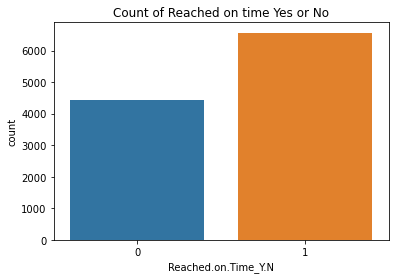

In [8]:
# Visualize on time delivery metric
plt.title('Count of Reached on time Yes or No')
sns.countplot(x =on_time,  data = shipping_df)

#### Studying spread of on time deliveries from warehouses

In [9]:
shipping_df['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
C    1833
B    1833
Name: Warehouse_block, dtype: int64

33% of shipments come from the F block warehouse, while the rest are distributed evenly amongst the other warehouses.

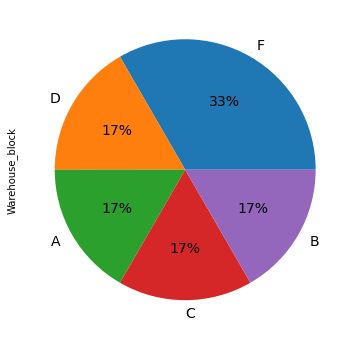

In [8]:
# Create a warehouse variable detailing value counts 
warehouses = shipping_df['Warehouse_block'].value_counts()
# Create a pie chart function to reproduce the figure for other variables
def create_pie(data) :
    plt.figure(figsize=(9, 6))
    data.plot.pie(fontsize=14, autopct='%1.0f%%')
    plt.show()
create_pie(warehouses)

<AxesSubplot:xlabel='Warehouse_block', ylabel='count'>

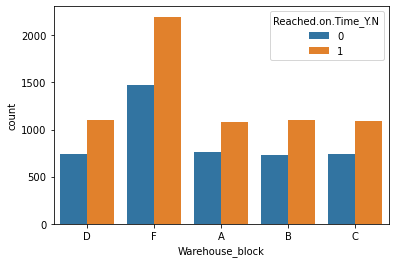

In [35]:
sns.countplot(x='Warehouse_block', hue=on_time, data=shipping_df)

The largest number of late and on time deliveries comes from Warehouse F. Although Warehouse F ships about twice as much as the other warehouses making the larger number of late deliveries proportionate, Warehouse F remains a good candidate for further analysis.

#### Product Importance

In [6]:
shipping_df['Product_importance'].describe()

count     10999
unique        3
top         low
freq       5297
Name: Product_importance, dtype: object

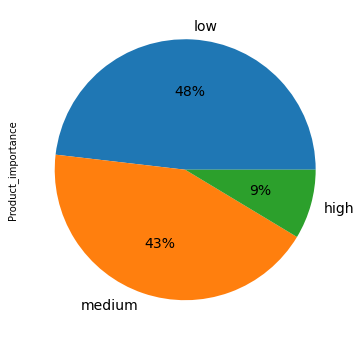

In [9]:
product_importance = shipping_df['Product_importance'].value_counts()
create_pie(product_importance)

<AxesSubplot:xlabel='Product_importance', ylabel='count'>

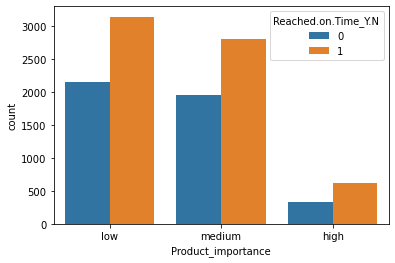

In [54]:
# On time deliveries for each importance category
sns.countplot(x='Product_importance', hue=on_time, data=shipping_df)

As reflected in the initial statistics, low importance products are the most often shipped, although medium products are not far behind.

#### Exploring Mode of Shipment

In [14]:
shipping_df['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

68% of shipments come via Ship, with a nearly equal parity coming from Flight and Road.

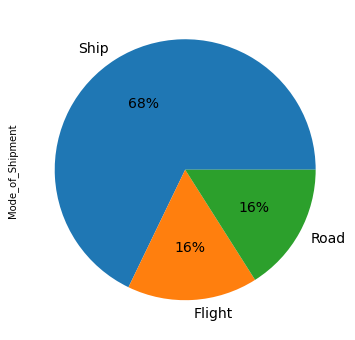

In [15]:
shipping_mode = shipping_df['Mode_of_Shipment'].value_counts()
create_pie(shipping_mode)

ID
Warehouse_block Mode_of_Shipment      
A               Flight             297
                Road               294
                Ship              1242
B               Flight             296
                Road               294
                Ship              1243
C               Flight             295
                Road               294
                Ship              1244
D               Flight             297
                Road               292
                Ship              1245
F               Flight             592
                Road               586
                Ship              2488

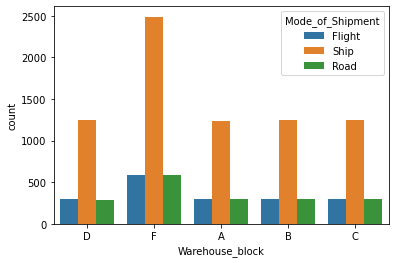

In [37]:
# Create a table and plot showing the distribution of shipment modes across warehouse blocks
sns.countplot(x='Warehouse_block', hue='Mode_of_Shipment', data=shipping_df)
shipping_df[["Mode_of_Shipment", "Warehouse_block", "ID"]].groupby(["Warehouse_block", "Mode_of_Shipment"]).count()

Warehouse F again sticks out as the largest shipping, road, and flight warehouse, with numbers all nearly double the other warehouses.

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='count'>

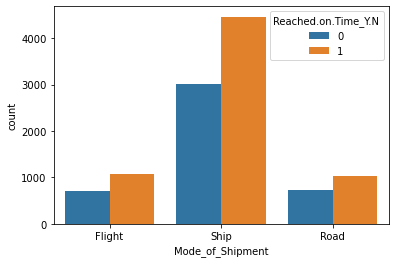

In [39]:
sns.countplot(x='Mode_of_Shipment', hue=on_time, data=shipping_df)

With shipping accounting for 68% of E-Commerce shipping's deliveries, it is no surprise shipping has a proportionate amount of late deliveries. All warehouses have about 40% of their deliveries late.

#### Customer Care Calls

In [16]:
# Show initial customer care calls statistics
care_calls = shipping_df['Customer_care_calls']
care_calls.describe()

count    10999.000000
mean         4.054459
std          1.141490
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: Customer_care_calls, dtype: float64

In [17]:
care_calls.value_counts()

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

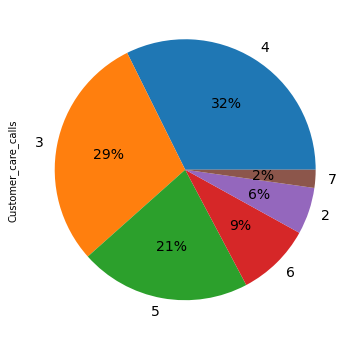

In [18]:
create_pie(care_calls.value_counts())

The biggest distribution of customer care calls occurs between 3 and 4. 4 care calls is both the largest at 32%, and the mean of customer care calls.

<AxesSubplot:xlabel='Customer_care_calls', ylabel='count'>

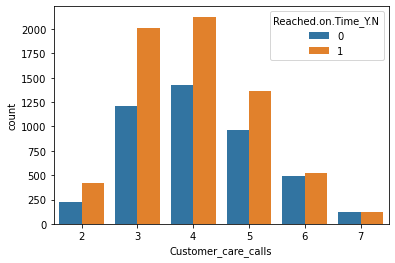

In [17]:
# Show the distribution of customer care calls for on time deliveries
sns.countplot(x='Customer_care_calls', hue=on_time, data=shipping_df)

Highest concentration by count of care calls in the 3-4 range. However, customer care calls at 6 and 7 show a much higher proportion of late and on time deliveries.

## Key Insights

After completing our exploratory analysis, we will now explore some key insights revealed in our data and look to uncover any insights related to accomplishing our business problem.

<AxesSubplot:xlabel='Customer_care_calls', ylabel='Reached.on.Time_Y.N'>

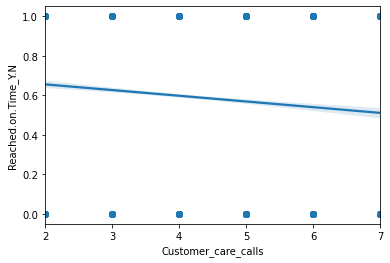

In [55]:
# Explore a linear regressions with customer care calls and the on time delivery metric.
sns.regplot(x='Customer_care_calls', y=on_time, data=shipping_df)

There looks to be a slight correlation between the number of customer care calls and the delivery reaching on time. The more care calls are placed, the less often the product arrives on time. This could be because late deliveries may cause more care calls to be placed. An area for continuous improvement for E-Commerce shipping could look to how do we reduce customer care calls and determine whether improving on time deliveries would also reduce customer care calls.

<AxesSubplot:xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

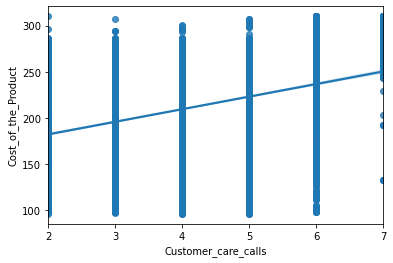

In [58]:
# Is product cost correlated with customer care calls?
sns.regplot(x='Customer_care_calls', y='Cost_of_the_Product', data=shipping_df)

The more costly the product is, the more customer care calls there are. This metric could be important when determining if unprofitable products are more costly or have trouble reaching the customer on time.

#### Product Cost

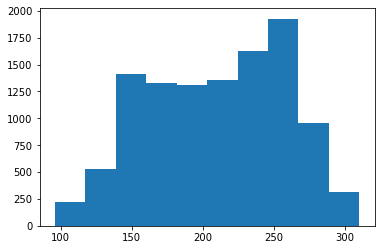

In [10]:
# Generate a histogram showing distribution of product cost
product_cost = shipping_df["Cost_of_the_Product"]
plt.hist(product_cost)
plt.show()

Largest concentration of product cost distributed between the 225 and 275 range.

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Reached.on.Time_Y.N'>

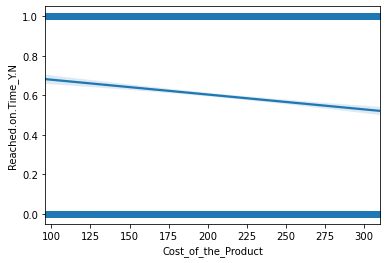

In [61]:
# Regression plot for product cost vs. on time deliveries
sns.regplot(x=product_cost, y=on_time, data=shipping_df)

Lower cost products reach customers on time more often. Higher cost products are also correlated with higher customer care calls.

#### Customer Rating

<AxesSubplot:xlabel='Customer_rating', ylabel='Reached.on.Time_Y.N'>

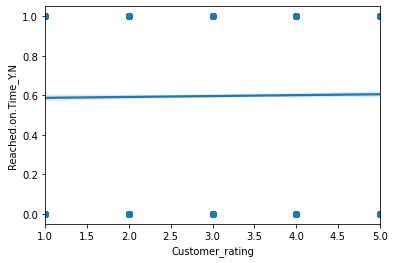

In [64]:
# Plot regression plot for customer rating and on time deliveries
sns.regplot(x='Customer_rating', y=on_time, data=shipping_df)

No correlation between customer rating and deliveries being reached on time. As costs have a greater incidence of correlation with on time deliveries, attempts by E-Commerce shipping to increase delivery timing could be a metric primarily cost centered and not for improving customer rating.

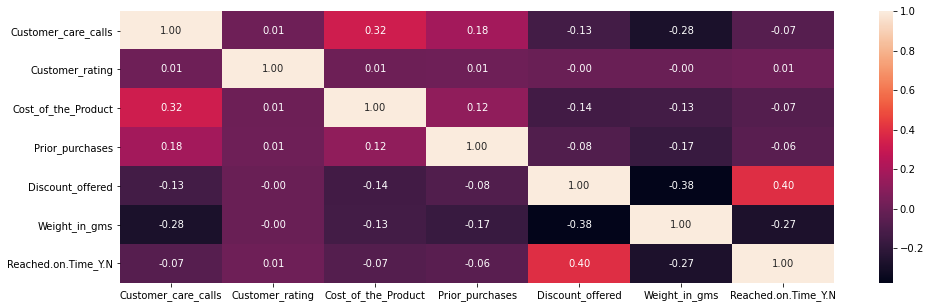

In [66]:
#Correlation plot to determine if any variables are correlated with on time delivery
col_list = ["Customer_care_calls","Customer_rating","Cost_of_the_Product","Prior_purchases","Discount_offered","Weight_in_gms","Reached.on.Time_Y.N"]
plt.figure(figsize = (16,5))
sns.heatmap(shipping_df[col_list].corr(), annot = True, fmt = ".2f")
plt.show()

From the correlation plot we can deduce some interesting correlations:

- Discount offered has a correlation with deliveries being reached on time with a value of .40. 
- Cost of the product also has a correlation with customer care calls, at .32.
- The weight in gms of the product has a negative correlation between the product reaching on time. We can likely deduce that a heavier product may impact shipping delivery time.

#### Discount Offered

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

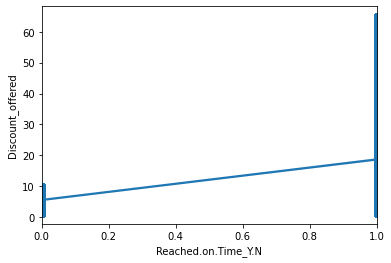

In [25]:
# Generate regression plot for on time deliveries and discounts offered
sns.regplot(x=on_time, y="Discount_offered", data=shipping_df)

Discounts 10 and below are correlated more with late deliveries. Discounts above 10 had a higher incidence of being on time.

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Reached.on.Time_Y.N'>

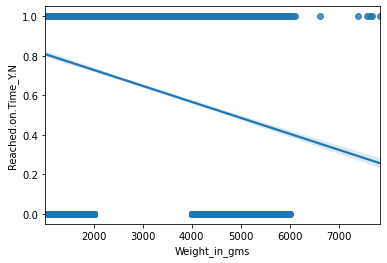

In [15]:
# Generate regression plot for product weight and on time deliveries
sns.regplot(x='Weight_in_gms', y=on_time, data=shipping_df)

Reflected in the correlation plot above, lighter products reach their destination on time more often than heavier products

## Recommendations

- E-Commerce shipping should perform a lean six sigma analysis on Warehouse F and discover the primary inefficiency driving late deliveries. Once this is discovered, develop a continuous improvement plan using the DMAIC framework to improve this constraint and then monitor the results over time. Once the improvement plan is complete, perform another analysis and see if on time deliveries have been improved over 60% and study this relationship to see if it results in the incidence of less costs.
- Perform an Pareto (80/20) analysis on selling patterns of products based on weight. Consider cutting the 20% least profitable and heaviest products and replacing them with the most profitable 20% light products with good selling patterns. This should increase the on time delivery metric (according to the regplot in the report) and increase E-Commerce Shipping's revenue.
- Customer care calls: Late deliveries form a much higher percentage of care calls in the 6-7 range. As 4 is the mean of care calls, analyze care calls in the 5 and up range (particularly 6 and 7), and determine how much late deliveries are contributing to increased customer service costs. Reducing E-Commerce shipping's late deliveries should have a decrease in the amount of customer service calls needed, and reduce customer service costs.
- Discounts offered has the highest correlation with a product reaching the customer on time. The discount program should be further analyzed to determine what the optimal discount should be for on time product delivery. A root cause analysis should be performed to further understand the relationship between discounts and deliveries, with a follow up report published to management detailing the results.